In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay

In [94]:
#loading data
df=pd.read_csv('application_data.csv')

In [95]:
#First few rows of data
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
#Dataset Description
print(df.shape)
print(df.info())

(307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [97]:
#Column Names (DATA FEATURES)
print(df.columns.to_list())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [98]:
#Checking Correlation of Target Feature
print(df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False))

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64


TARGET
0    282686
1     24825
Name: count, dtype: int64


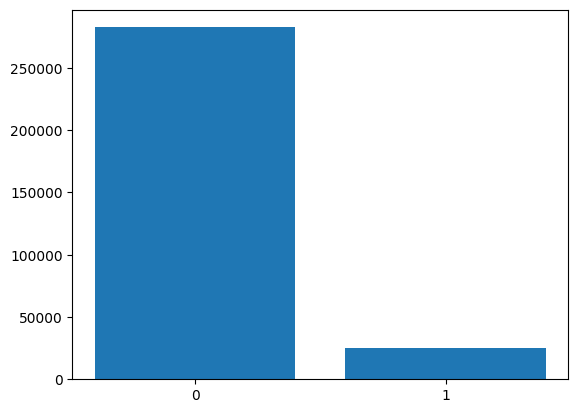

In [99]:
#Checking Data imbalance
print(df['TARGET'].value_counts())
target_counts = df['TARGET'].value_counts()
plt.bar(target_counts.index, target_counts.values)
plt.xticks([0,1])
plt.show()
#This shows data is imbalanced

VISUALIZATION OF SOME DATA RELATIONSHIPS

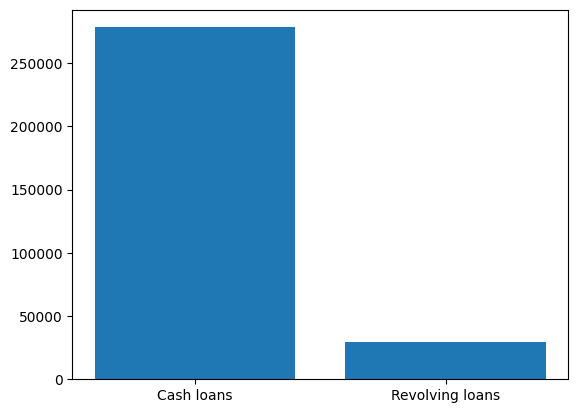

In [9]:
contract_counts = df['NAME_CONTRACT_TYPE'].value_counts()
plt.bar(contract_counts.index, contract_counts.values)
plt.show()

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

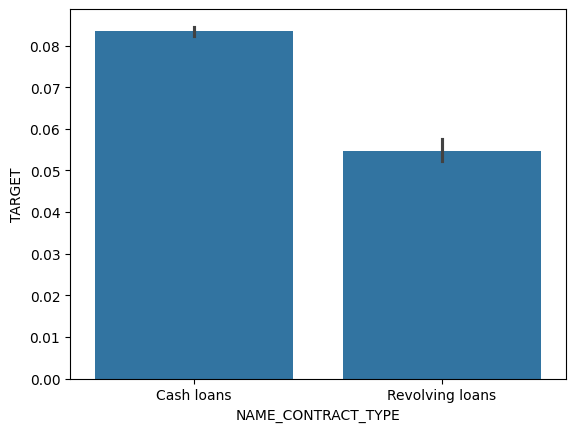

In [10]:
sns.barplot(x=df['NAME_CONTRACT_TYPE'], y=df['TARGET'])

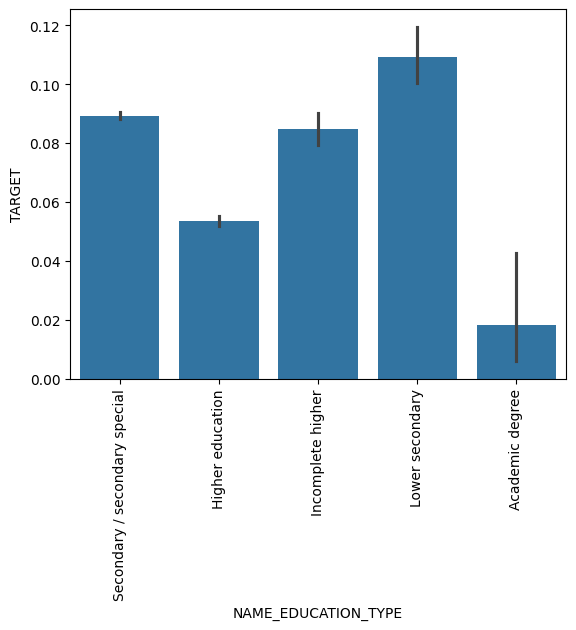

In [11]:
sns.barplot(x = df['NAME_EDUCATION_TYPE'], y = df['TARGET'])
plt.xticks(rotation = 'vertical')
plt.show()

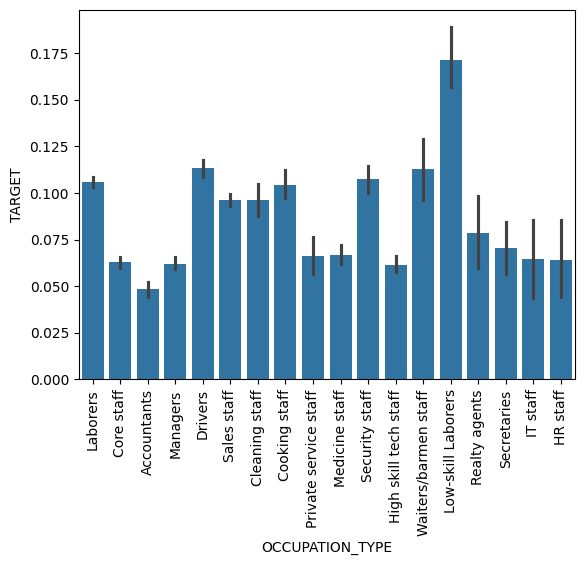

In [12]:
sns.barplot(x=df['OCCUPATION_TYPE'], y=df['TARGET'])
plt.xticks(rotation='vertical')
plt.show()

(array([21458., 79243., 82394., 52909., 31720., 16905.,  8849.,  5744.,
         2506.,  2769.]),
 array([ 25650.,  70335., 115020., 159705., 204390., 249075., 293760.,
        338445., 383130., 427815., 472500.]),
 <BarContainer object of 10 artists>)

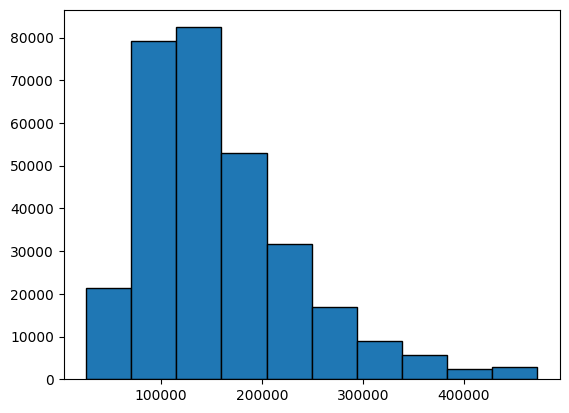

In [13]:
threshold = df['AMT_INCOME_TOTAL'].quantile(0.99)
filtered_data = df[df['AMT_INCOME_TOTAL'] <= threshold]
plt.hist(filtered_data['AMT_INCOME_TOTAL'],edgecolor='black')

<Axes: ylabel='AMT_INCOME_TOTAL'>

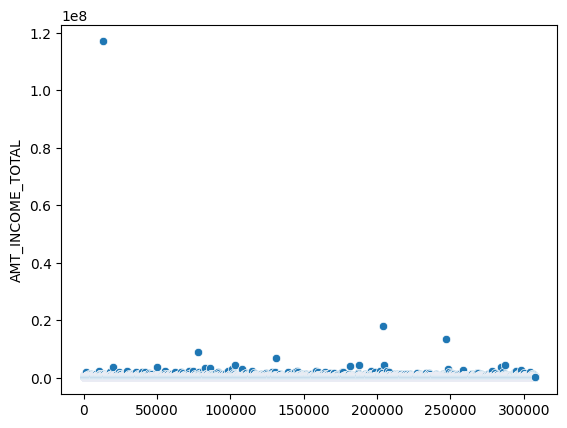

In [14]:
sns.scatterplot(df['AMT_INCOME_TOTAL'])

DATA PREPROCESSING

In [100]:
req_columns=['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 
             'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE', 
             'OCCUPATION_TYPE','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_DAY'
             ,'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','CNT_FAM_MEMBERS', 
             'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']
df=df[req_columns]

In [5]:
print(df.shape)
df.head()

(307511, 21)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,...,OCCUPATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,202500.0,406597.5,24700.5,351000.0,-9461,-637,...,Laborers,2.0,2.0,0.0,0.0,0.0,1.0,2,0,-1134.0
1,0,Cash loans,F,N,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,...,Core staff,1.0,0.0,0.0,0.0,0.0,2.0,1,0,-828.0
2,0,Revolving loans,M,Y,67500.0,135000.0,6750.0,135000.0,-19046,-225,...,Laborers,0.0,0.0,0.0,0.0,0.0,1.0,2,0,-815.0
3,0,Cash loans,F,N,135000.0,312682.5,29686.5,297000.0,-19005,-3039,...,Laborers,2.0,0.0,NaN,NaN,NaN,2.0,2,0,-617.0
4,0,Cash loans,M,N,121500.0,513000.0,21865.5,513000.0,-19932,-3038,...,Core staff,0.0,0.0,0.0,0.0,0.0,1.0,2,0,-1106.0


In [6]:
#Checking for null values
df.isnull().sum()

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_EDUCATION_TYPE               0
OCCUPATION_TYPE               96391
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REG_REGION_NOT_WORK_REGION        0
DAYS_LAST_PHONE_CHANGE            1
dtype: int64

In [101]:
#removing records with null values
df.dropna(inplace=True)
df.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
NAME_EDUCATION_TYPE           0
OCCUPATION_TYPE               0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
REG_REGION_NOT_WORK_REGION    0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [102]:
print(df.info())
print(df['TARGET'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 182036 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      182036 non-null  int64  
 1   NAME_CONTRACT_TYPE          182036 non-null  object 
 2   CODE_GENDER                 182036 non-null  object 
 3   FLAG_OWN_CAR                182036 non-null  object 
 4   AMT_INCOME_TOTAL            182036 non-null  float64
 5   AMT_CREDIT                  182036 non-null  float64
 6   AMT_ANNUITY                 182036 non-null  float64
 7   AMT_GOODS_PRICE             182036 non-null  float64
 8   DAYS_BIRTH                  182036 non-null  int64  
 9   DAYS_EMPLOYED               182036 non-null  int64  
 10  NAME_EDUCATION_TYPE         182036 non-null  object 
 11  OCCUPATION_TYPE             182036 non-null  object 
 12  OBS_30_CNT_SOCIAL_CIRCLE    182036 non-null  float64
 13  DEF_30_CNT_SOCIAL_C

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
TARGET,1.000000,-0.002736,-0.038711,-0.019001,-0.048328,0.064500,0.075055,0.011428,0.032631,0.000923,0.000576,-0.015403,0.000415,0.060861,0.001468,0.056377
AMT_INCOME_TOTAL,-0.002736,1.000000,0.124954,0.153400,0.127244,-0.017433,-0.008432,-0.011771,-0.011371,0.002903,0.002364,0.019670,-0.001089,-0.069719,0.047900,-0.010171
AMT_CREDIT,-0.038711,0.124954,1.000000,0.761431,0.986377,-0.152595,-0.086540,-0.003606,-0.024679,0.004508,-0.001987,0.052262,0.033190,-0.103312,0.048541,-0.068490
AMT_ANNUITY,-0.019001,0.153400,0.761431,1.000000,0.765529,-0.092356,-0.050588,-0.014100,-0.023401,0.000744,0.014588,0.036142,0.042354,-0.126277,0.073967,-0.061866
AMT_GOODS_PRICE,-0.048328,0.127244,0.986377,0.765529,1.000000,-0.147683,-0.088927,-0.003871,-0.025585,0.004781,-0.001352,0.054702,0.031741,-0.104923,0.049580,-0.071727


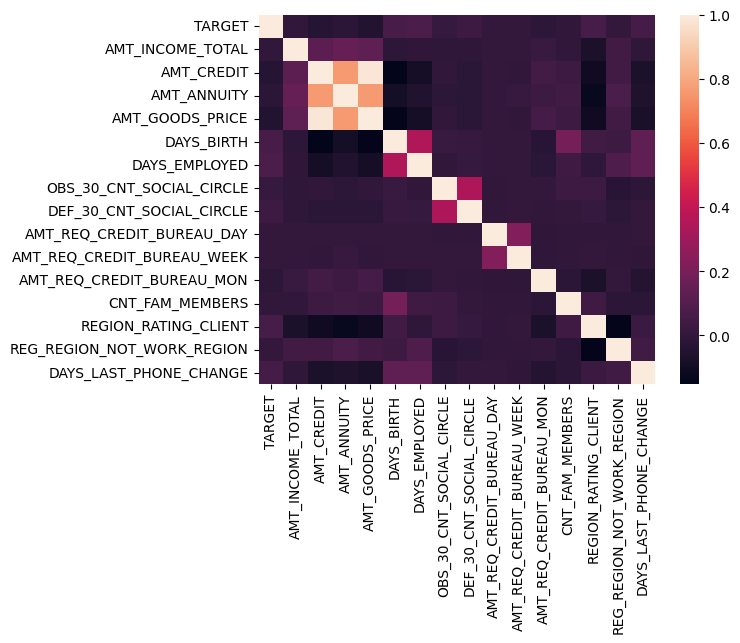

In [103]:
#Printing and Plotting Correlation between features
df_corr=df.corr(numeric_only = True)
sns.heatmap(df_corr)
df_corr.head()

In [104]:
#Encoding Categorical Features (object(string) datatype)

ctgr_features= df.select_dtypes(include=["object"]).columns
print(ctgr_features)

df_encoded= pd.get_dummies(df,columns=ctgr_features,drop_first=True)
df_encoded.head()

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')


,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,202500.0,406597.5,24700.5,351000.0,-9461,-637,2.0,2.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,0,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0,67500.0,135000.0,6750.0,135000.0,-19046,-225,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
4,0,121500.0,513000.0,21865.5,513000.0,-19932,-3038,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5,0,99000.0,490495.5,27517.5,454500.0,-16941,-1588,0.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False


In [105]:
#Dividing Data into features and target set
x=df_encoded.drop('TARGET',axis='columns')
y=df_encoded['TARGET']

#AS DATA IS IMBALANCED WE HANDLE THIS USING SMOTE
smote = SMOTE(random_state=45)
x_sample, y_sample = smote.fit_resample(x, y)

#SPLITING THE DATASET USING TRAIN AND TEST
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.2, random_state=45, stratify=y_sample)

In [11]:
print(df.shape)

(182036, 21)


c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.72      0.69      0.70     33343
           1       0.70      0.73      0.72     33343

    accuracy                           0.71     66686
   macro avg       0.71      0.71      0.71     66686
weighted avg       0.71      0.71      0.71     66686



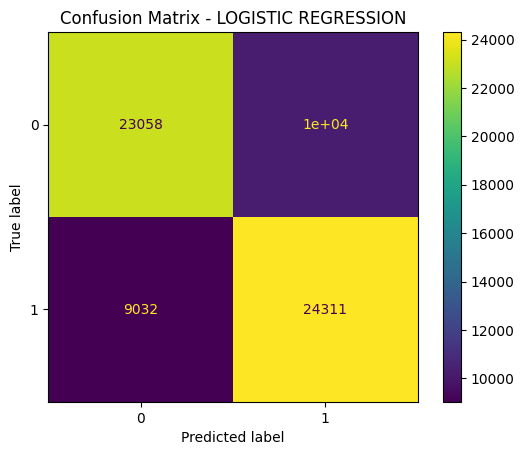

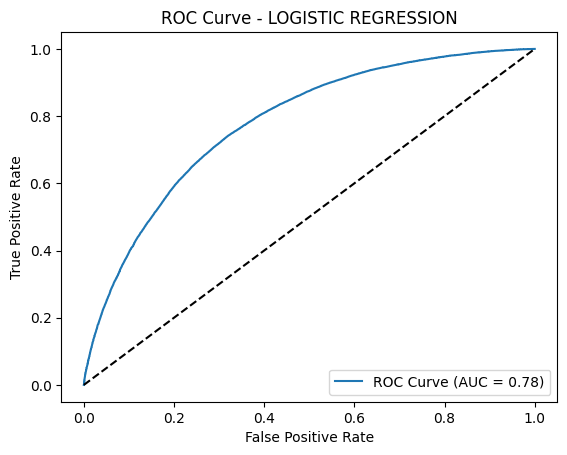

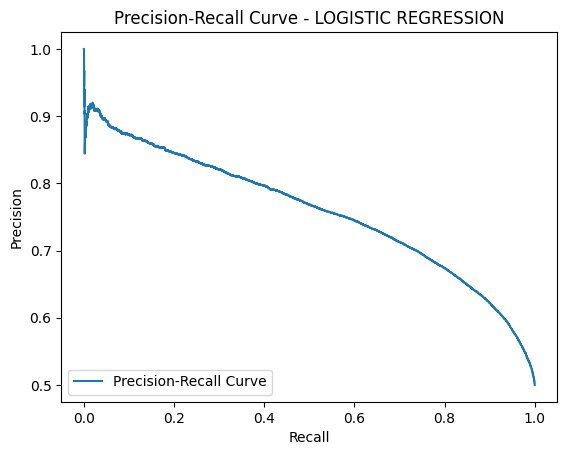

In [12]:
#LOGISTIC REGRESSION

l_r=LogisticRegression(class_weight='balanced',max_iter=1000)
l_r.fit(x_train,y_train)

#CLASSIFICATION REPORT
y_pred1=l_r.predict(x_test)
print(classification_report(y_test,y_pred1))

#CONFUSION MATRIX
ConfusionMatrixDisplay.from_estimator(l_r,x_test,y_test)
plt.title('Confusion Matrix - LOGISTIC REGRESSION')
plt.show()

#ROC curve
y_prob1 = l_r.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve - LOGISTIC REGRESSION')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob1)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title(f'Precision-Recall Curve - LOGISTIC REGRESSION')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     33343
           1       0.97      0.81      0.89     33343

    accuracy                           0.90     66686
   macro avg       0.91      0.90      0.89     66686
weighted avg       0.91      0.90      0.89     66686



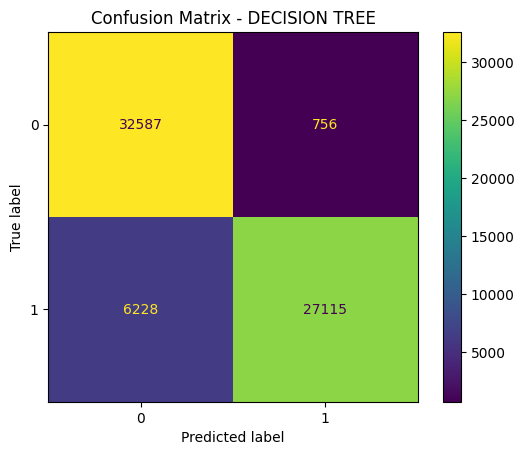

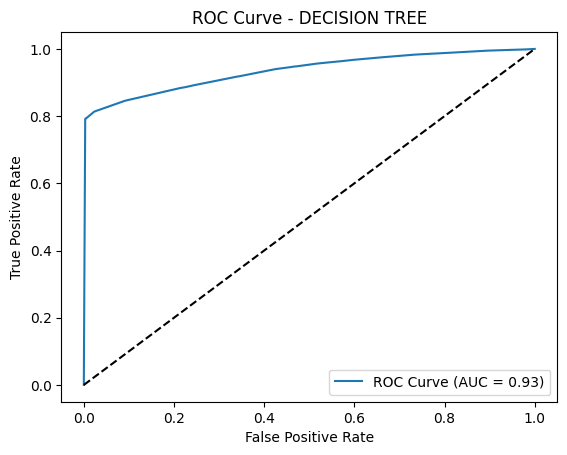

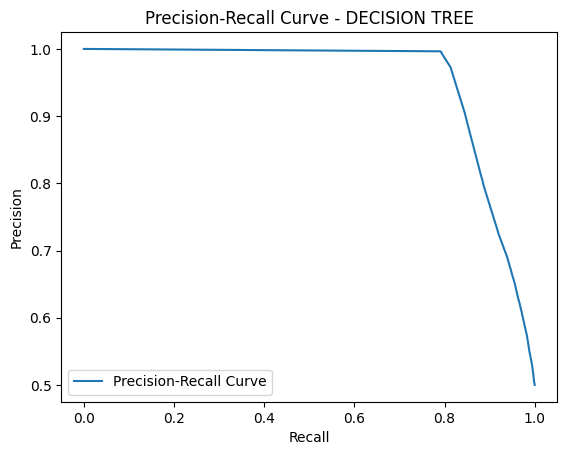

In [24]:
#DECISION TREE
d_t=DecisionTreeClassifier(max_depth=15,class_weight='balanced',random_state=45)
d_t.fit(x_train,y_train)

#CLASSIFICATION REPORT
y_pred2=d_t.predict(x_test)
print(classification_report(y_test,y_pred2))

#CONFUSION MATRIX
ConfusionMatrixDisplay.from_estimator(d_t,x_test,y_test)
plt.title('Confusion Matrix - DECISION TREE')
plt.show()

#ROC curve
y_prob2 = d_t.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title(f'ROC Curve - DECISION TREE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob2)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.title(f'Precision-Recall Curve - DECISION TREE')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     33343
           1       0.97      0.88      0.92     33343

    accuracy                           0.92     66686
   macro avg       0.93      0.92      0.92     66686
weighted avg       0.93      0.92      0.92     66686



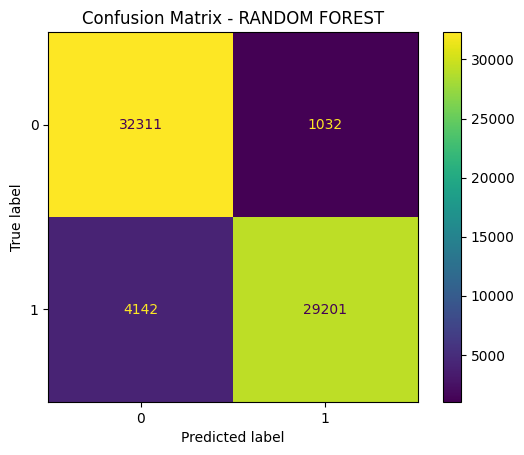

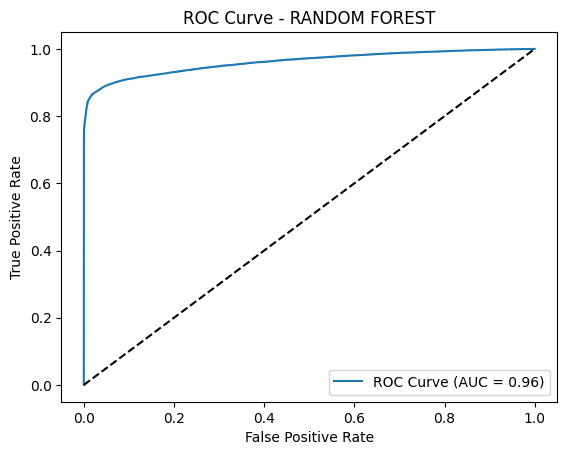

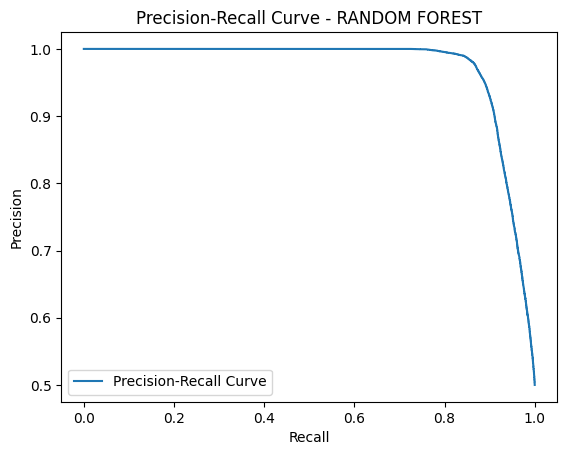

In [25]:
# RANDOM FOREST
r_f = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15,     
    class_weight='balanced', 
    random_state=45          
)
r_f.fit(x_train, y_train)

# CLASSIFICATION REPORT
y_pred_rf = r_f.predict(x_test)
print(classification_report(y_test, y_pred_rf))

# CONFUSION MATRIX
ConfusionMatrixDisplay.from_estimator(r_f, x_test, y_test)
plt.title('Confusion Matrix - RANDOM FOREST')
plt.show()

# ROC Curve
y_prob_rf = r_f.predict_proba(x_test)[:, 1] 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.title('ROC Curve - RANDOM FOREST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(recall_rf, precision_rf, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve - RANDOM FOREST')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


              precision    recall  f1-score   support

           0       0.89      0.92      0.91     33343
           1       0.92      0.88      0.90     33343

    accuracy                           0.90     66686
   macro avg       0.90      0.90      0.90     66686
weighted avg       0.90      0.90      0.90     66686



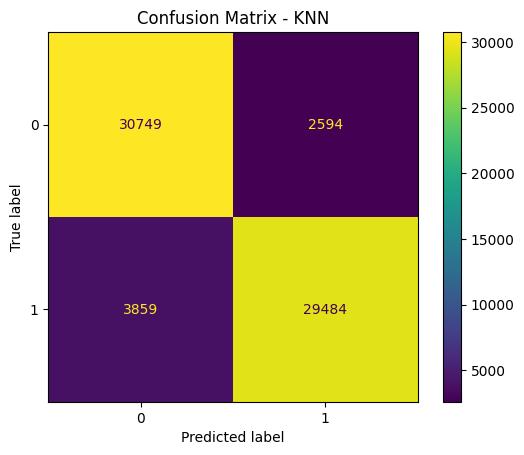

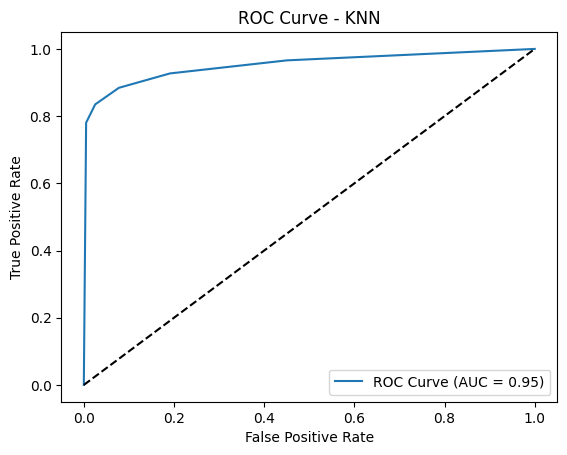

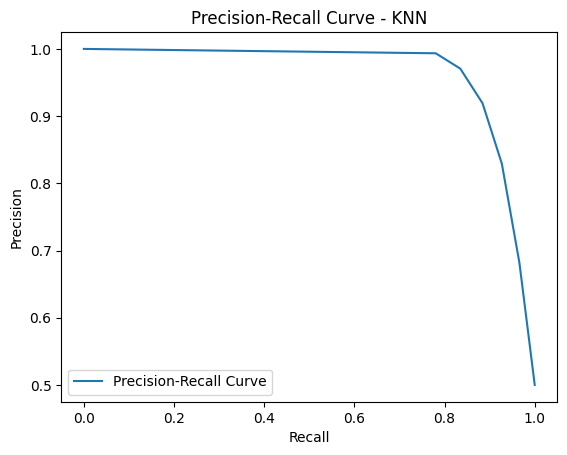

In [26]:
#KNN
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_model = KNeighborsClassifier(
    n_neighbors=5,          
    weights='uniform',     
    n_jobs=-1              
)
knn_model.fit(x_train_scaled, y_train)

# CLASSIFICATION REPORT
y_pred_knn = knn_model.predict(x_test_scaled)
print(classification_report(y_test, y_pred_knn))

# CONFUSION MATRIX
ConfusionMatrixDisplay.from_estimator(knn_model, x_test_scaled, y_test)
plt.title('Confusion Matrix - KNN')
plt.show()

# ROC Curve
y_prob_knn = knn_model.predict_proba(x_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.title('ROC Curve - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)
plt.figure()
plt.plot(recall_knn, precision_knn, label='Precision-Recall Curve')
plt.title('Precision-Recall Curve - KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

In [107]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define model and hyperparameter space (non-KNN)
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=45),
        'params': {
            'max_depth': [10, 15, 20, 25]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=45),
        'params': {
            'max_depth': [10, 15, 20],
            'n_estimators': [75, 100, 125]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(class_weight='balanced', random_state=45),
        'params': {
            'max_iter': [1000, 2000],
            'solver': ['liblinear']
        }
    }
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=45)
scores = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(
        mp['model'],
        mp['params'],
        n_iter=5,
        cv=cv,
        n_jobs=-1,
        random_state=45
    )
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

knn_clf = RandomizedSearchCV(
    knn_pipeline,
    knn_params,
    n_iter=5,
    cv=cv,
    n_jobs=-1,
    random_state=45
)
knn_clf.fit(x_train, y_train)

# Append KNN results
scores.append({
    'model': 'knn',
    'best_score': knn_clf.best_score_,
    'best_params': knn_clf.best_params_
})

# Results DataFrame
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best_score,best_params
0,decision_tree,0.915027,{'max_depth': 25}
1,random_forest,0.936740,"{'n_estimators': 100, 'max_depth': 20}"
2,logistic_regression,0.582882,"{'solver': 'liblinear', 'max_iter': 1000}"
3,knn,0.921801,"{'knn__weights': 'distance', 'knn__p': 1, 'knn..."


In [109]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=45),
        'params': {
            'max_depth': [10, 15, 20, 25]  
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=45),
        'params': {
            'max_depth': [10, 15, 20],
            'n_estimators': [75, 100, 125]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(class_weight='balanced', random_state=45),
        'params': {
            'max_iter': [1000, 2000],
            'solver': ['liblinear']
        }
    }
}

# Stratified KFold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=45)
scores = []

# Grid Search for non-KNN models
for model_name, mp in model_params.items():
    clf = GridSearchCV(
        mp['model'],
        mp['params'],
        cv=cv,
        n_jobs=-1,
        verbose=1  # Optionally show the progress
    )
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# KNN Hyperparameter Tuning using GridSearchCV
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# GridSearchCV for KNN
knn_clf = GridSearchCV(
    knn_pipeline,
    knn_params,
    cv=cv,
    n_jobs=-1,
    verbose=1 
)
knn_clf.fit(x_train, y_train)

# Append KNN results
scores.append({
    'model': 'knn',
    'best_score': knn_clf.best_score_,
    'best_params': knn_clf.best_params_
})

# Results DataFrame
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


,model,best_score,best_params
0,decision_tree,0.915027,{'max_depth': 25}
1,random_forest,0.936740,"{'max_depth': 20, 'n_estimators': 100}"
2,logistic_regression,0.582882,"{'max_iter': 1000, 'solver': 'liblinear'}"
3,knn,0.922030,"{'knn__n_neighbors': 9, 'knn__p': 1, 'knn__wei..."
